<a href="https://colab.research.google.com/github/AngelB26/Wine_Quality_Analysis/blob/main/Wine_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAJOR PROJECT**


---
DATA SCIENCE INTERNSHIP - OCTOBER 2023


---







**Wine Quality Analysis**

Instructions

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

Attribute Information:

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

***NOTE***

TO CONVERT THE XLSX From CSV - https://cloudconvert.com/xls-to-csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
df=pd.read_csv('/content/1788410-1767134-1729261-1613779-Red_wine__(1).csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [4]:
#no of rows and columns
df.shape

(1599, 12)

In [5]:
#printing first five rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [6]:
#printing last five rows
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.52,0.66,11.0,6.0


In [7]:
#finding for missing values
df.isnull().sum()
#there are missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [8]:
#summary of data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [9]:
df['total sulfur dioxide'].unique()

array([ 34. ,  67. ,  54. ,  60. ,  40. ,  59. ,  21. ,  18. ,   nan,
        65. , 102. ,  29. , 145. , 148. , 103. ,  56. ,  71. ,  37. ,
        23. ,  11. ,  35. ,  16. ,  82. , 113. ,  83. ,  50. ,  15. ,
        30. ,  19. ,  87. ,  46. ,  14. , 114. ,  12. ,  96. , 119. ,
        73. ,  45. ,  10. , 110. ,  52. , 112. ,  39. ,  27. ,  94. ,
        43. ,  42. ,  80. ,  51. ,  61. , 136. ,  31. , 125. ,  24. ,
       140. , 133. ,  85. , 106. ,  22. ,  36. ,  69. ,  64. , 153. ,
        47. , 108. , 111. ,  62. ,  28. ,  89. ,  13. ,  90. , 134. ,
        99. ,  26. ,  63. , 105. ,  20. , 141. ,  88. , 129. , 128. ,
        86. , 121. , 101. ,  44. ,   8. ,  49. ,  38. , 143. , 144. ,
       127. , 126. , 120. ,  55. ,  93. ,  95. ,  41. ,  58. ,  72. ,
        81. , 109. ,  33. ,  53. ,  98. ,  48. ,  70. ,  25. , 135. ,
        92. ,  74. ,  32. ,  77. , 165. ,  75. , 124. ,  78. , 122. ,
        66. ,  68. ,  17. ,  91. ,  76. , 151. , 142. , 116. , 149. ,
        57. , 104. ,

In [10]:
# Extract the "total sulfur dioxide" column from the DataFrame df
df['total sulfur dioxide'].value_counts()

28.0     43
24.0     36
15.0     35
18.0     35
23.0     34
         ..
139.0     1
149.0     1
152.0     1
155.0     1
165.0     1
Name: total sulfur dioxide, Length: 144, dtype: int64

<Axes: >

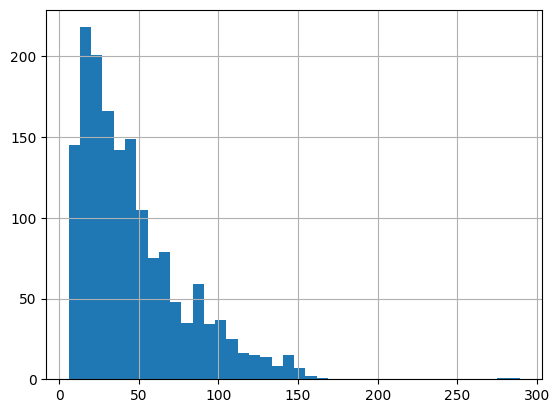

In [11]:
# Plot a histogram for the "total sulfur dioxide" column in the DataFrame df
# Setting the number of bins to 40 for a more detailed distribution
df['total sulfur dioxide'].hist(bins=40)

<Axes: >

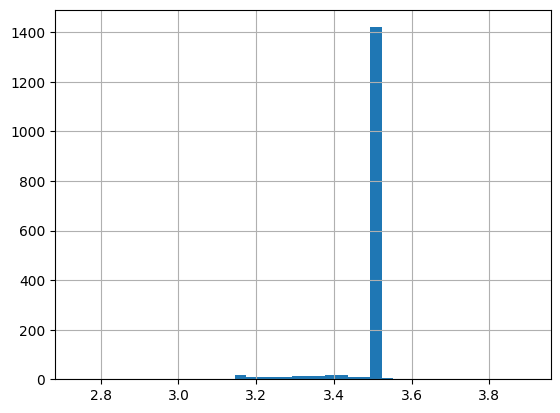

In [12]:
# Fill missing values in the "total sulfur dioxide" column with the mean value
df['total sulfur dioxide']=df['total sulfur dioxide'].fillna(df['total sulfur dioxide'].mean())
# Plot a histogram for the "pH" column in the DataFrame df
# Setting the number of bins to 40 for a more detailed distribution
df['pH'].hist(bins=40)

<Axes: >

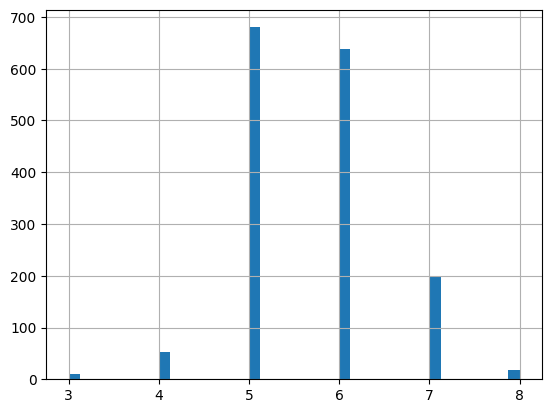

In [13]:
# Fill missing values in the "pH" column with the median value
df['pH']=df['pH'].fillna(df['pH'].median())
# Plot a histogram for the "quality" column in the DataFrame df
# Setting the number of bins to 40 for a more detailed distribution
df['quality'].hist(bins=40)

In [14]:
# Retrieve the unique values in the "quality" column of the DataFrame df
df['quality'].unique()

array([ 5.,  6.,  7.,  4., nan,  8.,  3.])

In [15]:
# Fill missing values in the "quality" column with the mean value
df['quality']=df['quality'].fillna(df['quality'].mean())

In [16]:
#now there are no missing values in the data set
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

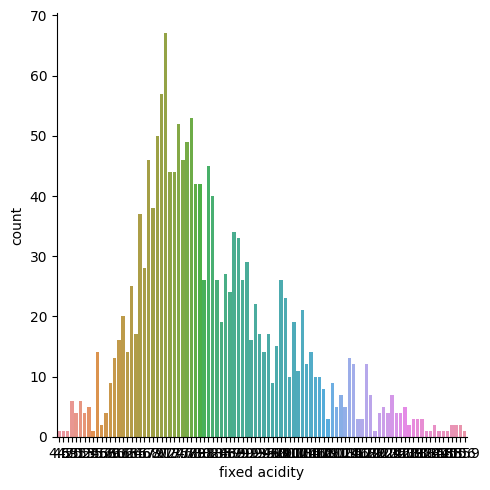

In [17]:
#plotting the graph of fixed acidity usind seaborn catplot's
sns.catplot(x='fixed acidity',data = df, kind='count')

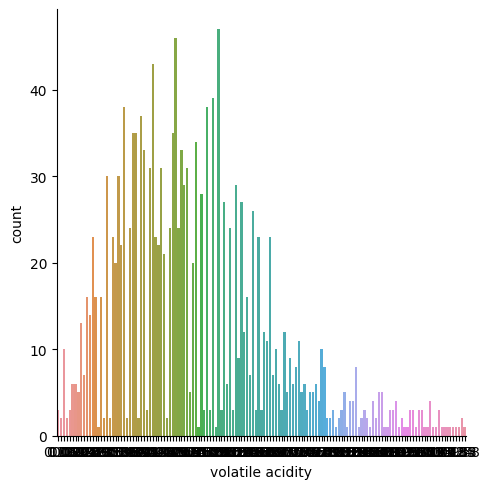

In [18]:
sns.catplot(x='volatile acidity',data = df, kind='count')

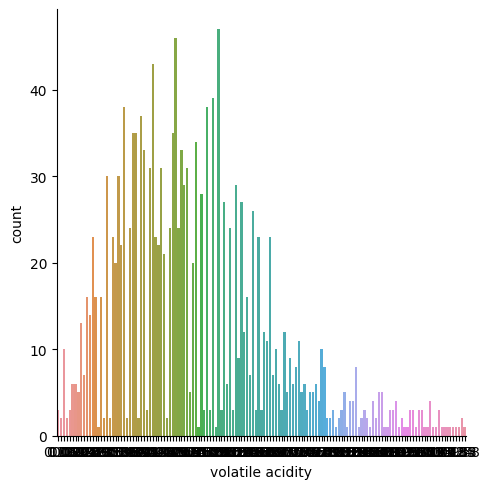

In [19]:
sns.catplot(x='volatile acidity',data = df, kind='count')

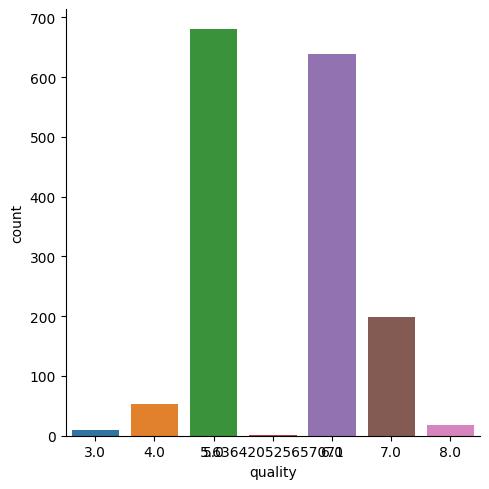

In [20]:
# Create a categorical plot (catplot) for the 'quality' column
# Using Seaborn's catplot to show the count of each unique value
# along the x-axis (quality in this case)
sns.catplot(x='quality',data = df, kind='count')

<Axes: >

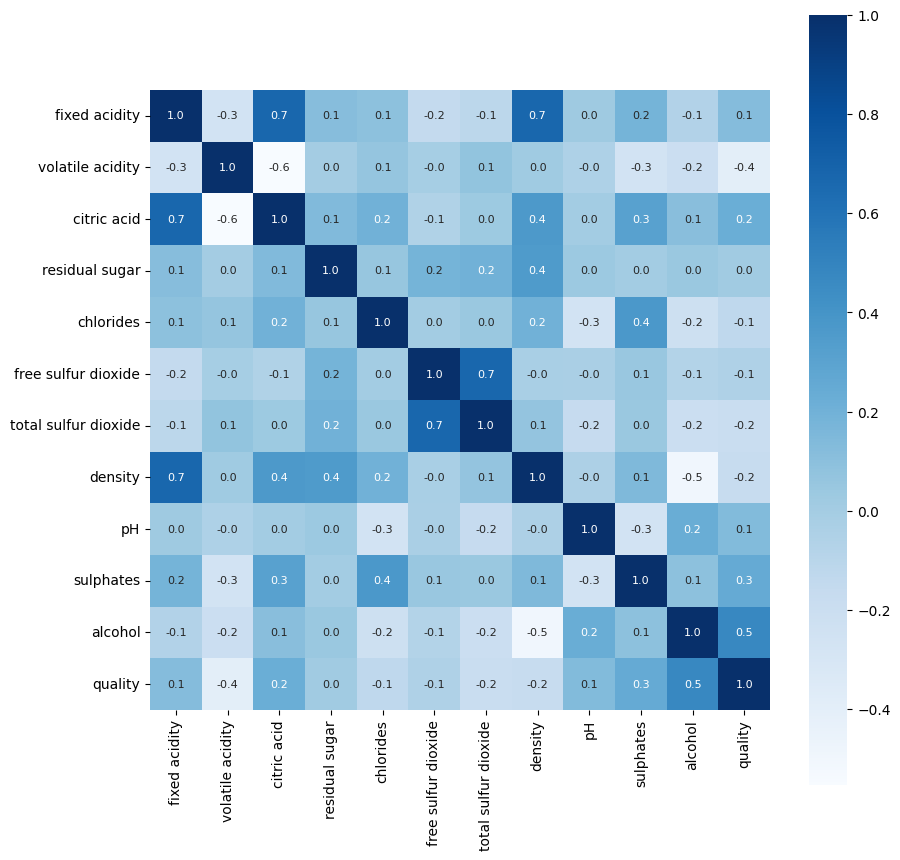

In [21]:
# Calculate the correlation matrix for the DataFrame df
correlation = df.corr()
# Set up a matplotlib figure with a size of 10x10 inches
plt.figure(figsize=(10, 10))
# Create a heatmap using Seaborn to visualize the correlation matrix
# cbar=True adds a colorbar, square=True makes the plot square-shaped
# fmt='.1f' formats the values with one decimal place
# annot=True displays values in the cells
# annot_kws={'size': 8} sets the size of the annotation text
# cmap='Blues' uses the 'Blues' color map
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')


In [22]:
# Create a new DataFrame X by dropping the 'quality' column from the original DataFrame df
X = df.drop('quality', axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [23]:
# printing the columns form the dataset
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [24]:
# Create a new Series Y by applying a lambda function to the 'quality' column of the DataFrame df
# The lambda function assigns 1 if the quality value is greater than or equal to 7, and 0 otherwise
Y = df['quality'].apply(lambda y_value :1 if y_value >=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [25]:
# Split the data into training and testing sets
# X_train and Y_train represent the features and labels for training, while X_test and Y_test are for testing
# test_size=0.2 indicates that 20% of the data will be used for testing
# random_state=3 ensures reproducibility by fixing the random seed
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state =3)
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


In [26]:
# Create a RandomForestClassifier model
model = RandomForestClassifier()
# Train the model using the training data (X_train and Y_train)
model.fit(X_train, Y_train)


RandomForestClassifier()

In [27]:
# Use the trained model to make predictions on the test data
X_test_prediction = model.predict(X_test)
# Calculate the accuracy score by comparing the predicted labels with the actual labels (Y_test)
test_data_accuracy = accuracy_score (X_test_prediction, Y_test)

In [28]:
#printing te accuracy score
print('Accuracy :',test_data_accuracy)

Accuracy : 0.925


In [29]:
# Input data for prediction
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
# Convert the input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)
# Reshape the array to match the shape expected by the model (1 sample, -1: inferred)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# Make a prediction using the trained model
prediction = model.predict(input_data_reshaped)
# Print the raw prediction
print(prediction)
# now check the prediction by using if and else statement
if (prediction[0] == 1):
    print('goooooooooooooooooood qualityyyyyyy wineeee')
else:
    print('baddddddddddddddddddd qualityyyyyyy wineeee')

[1]
goooooooooooooooooood qualityyyyyyy wineeee


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
